# Gráficos de distribución

## Histogramas
Este tipo de gráficos representan la cantidad de incidencias (frecuencia) de un valor, por medio de barras. Su implementación, como hasta ahora, es muy simple.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

iris_data = pd.read_csv('assets/input/iris.csv', index_col='Id')
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\livra\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Distribución')

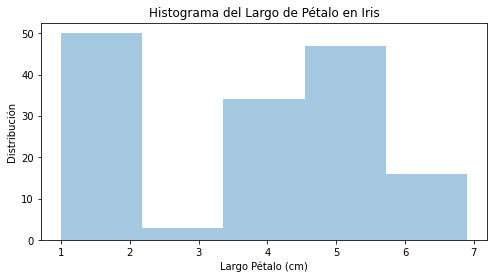

In [3]:
plt.figure(figsize=(8,4))

sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)

plt.title('Histograma del Largo de Pétalo en Iris')
plt.xlabel('Largo Pétalo (cm)')
plt.ylabel('Distribución')

## Gráficos de Densidad (KDE)
Se puede pensar en estos como una verisón suavizada del anterior.

Text(0, 0.5, 'Densidad')

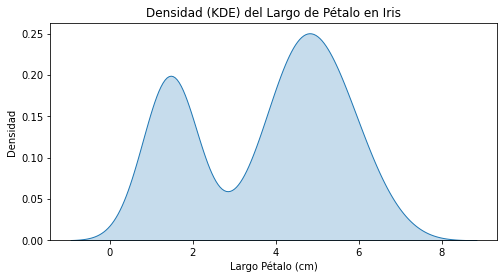

In [4]:
plt.figure(figsize=(8,4))

sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

plt.title('Densidad (KDE) del Largo de Pétalo en Iris')
plt.xlabel('Largo Pétalo (cm)')
plt.ylabel('Densidad')

### KDE de 2 dimensiones
Estos gráficos no están limitados a una sola columna de datos. Se puede crear uno de 2 dimensiones que permita evaluar la densidad de distribución de valores de 2 variables al mismo tiempo.

Por ejemplo, evaluaremos la densidad de distribución respecto al "*largo del pétalo*" y al "*ancho de la sepa*".

Text(336.9714285714286, 0.5, 'Ancho Sepa (cm)')

<Figure size 576x288 with 0 Axes>

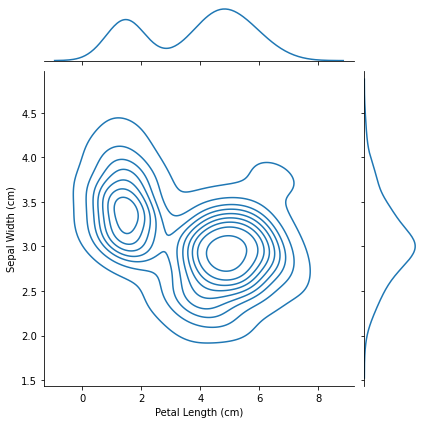

In [14]:
plt.figure(figsize=(8,4))

sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'] , kind='kde')

plt.xlabel('Largo Pétalo (cm)')
plt.ylabel('Ancho Sepa (cm)')

## Gráficos Múltiples (ColorCoded)
Supongamos que queremos comprender las diferencias entre especies y, para ello, graficar la densidad del tamaño de los pétalos, discriminándolo por especia, podríamos combinar los **3 gráficos en uno**, donde a cada uno de los integrantes se le asignará un color para poder diferenciarlo.

In [15]:
# Data de cada especia por separado 
# (ya hay un csv listo, pero podria hacerlo directo del dataframe, evaluando Specie)
iris_set_data = pd.read_csv('assets/input/iris_setosa.csv', index_col="Id")
iris_ver_data = pd.read_csv('assets/input/iris_versicolor.csv', index_col="Id")
iris_vir_data = pd.read_csv('assets/input/iris_virginica.csv', index_col="Id")

C:\Users\livra\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


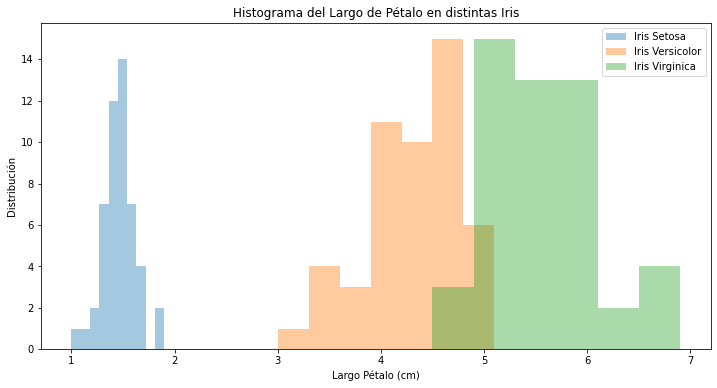

In [23]:
plt.figure(figsize=(12,6))

# Comino 3 graficos (histograma)
sns.distplot(a=iris_set_data['Petal Length (cm)'], label='Iris Setosa', kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label='Iris Versicolor', kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label='Iris Virginica', kde=False)

plt.title('Histograma del Largo de Pétalo en distintas Iris')
plt.xlabel('Largo Pétalo (cm)')
plt.ylabel('Distribución')
plt.legend()

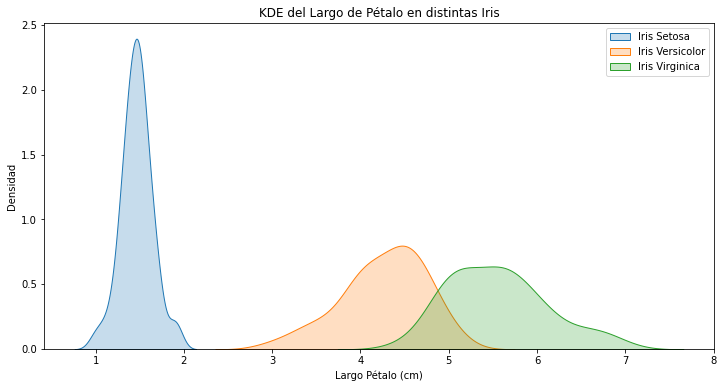

In [25]:
plt.figure(figsize=(12,6))

# Comino 3 graficos (Densidad KDE)
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label='Iris Setosa', shade=True)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label='Iris Versicolor', shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label='Iris Virginica', shade=True)

plt.title('KDE del Largo de Pétalo en distintas Iris')
plt.xlabel('Largo Pétalo (cm)')
plt.ylabel('Densidad')
plt.legend()

Por medio de este gráfico podemos obtener grandes conclusiones, como, por ejemplo, que en estas flores pareciera haber 2 grupos principales, *iris setosa* por un lado e *iris versicolor/virgínica* por el otro, de tal manera que, si quisiéramos por ejemplo diferenciar a las *setosa* bastaría con tan solo observar el largo de su pétalo, donde si este es menor a 2 cm, ya podremos clasificarla como tal, con un alto grado de certeza.

## Práctica
Para poner en práctica estos nuevos conocimientos analizaremos una base de datos referente a información sobre distintas imágenes de tumores (benignos y malignos). De esta manera, se pretende encontrar patrones que nos ayuden a clasificar a un tumor como benigno o maligno, según sus características. 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

cancer_b_data = pd.read_csv('assets/input/cancer_b.csv', index_col='Id')
cancer_m_data = pd.read_csv('assets/input/cancer_m.csv', index_col='Id')
cancer_b_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


### 1. Investigar diferencias
Para un primer análisis, comparar por medio de un histograma, la distribución del tamaño del área media de los tumores benignnos y malignos.

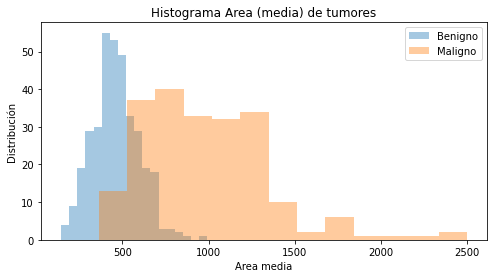

In [41]:
plt.figure(figsize=(8,4))

sns.distplot(a=cancer_b_data['Area (mean)'], label='Benigno', kde=False)
sns.distplot(a=cancer_m_data['Area (mean)'], label='Maligno', kde=False)

plt.title('Histograma Area (media) de tumores')
plt.xlabel('Area media')
plt.ylabel('Distribución')
plt.legend()

Del histograma anterior podemos concluir en que los tumores **malignos tienen, en general, un mayor tamaño que los benignos.** Además, los malignos presentan un rango más amplio de valores posibles para el área.

### 2. Análisis del Radio
Analizar la distribución de valores para el *'Radius (worst)'*, mediante gráficos de KDE.

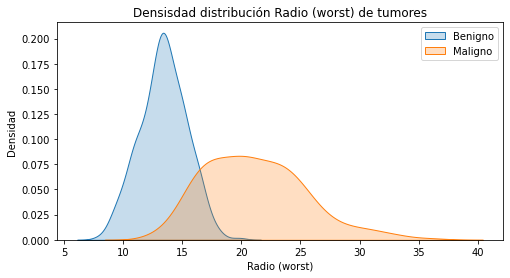

In [42]:
plt.figure(figsize=(8,4))

sns.kdeplot(data=cancer_b_data['Radius (worst)'], label='Benigno', shade=True)
sns.kdeplot(data=cancer_m_data['Radius (worst)'], label='Maligno', shade=True)

plt.title('Densisdad distribución Radio (worst) de tumores')
plt.xlabel('Radio (worst)')
plt.ylabel('Densidad')
plt.legend()

Agrego otro gráfico para seguir practicando. En este caso, evalúo la densidad de valores tanto del Área como el Radio, simultáneamente, de manera de encontrar relaciones entre estas características y la clasficación de benigno/maligno.

Text(336.9714285714286, 0.5, 'Radio (worst)')

<Figure size 576x288 with 0 Axes>

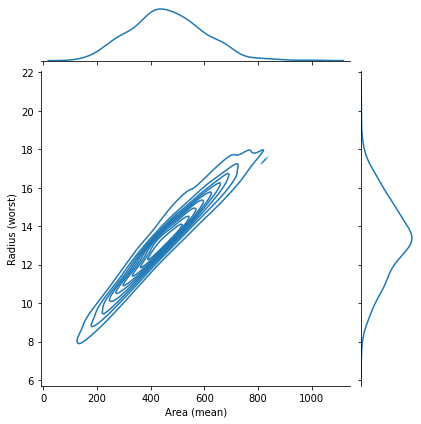

In [47]:
sns.jointplot(x=cancer_b_data['Area (mean)'], y=cancer_b_data['Radius (worst)'], kind='kde')

plt.xlabel('Area (media)')
plt.ylabel('Radio (worst)')

Text(336.9714285714286, 0.5, 'Radio (worst)')

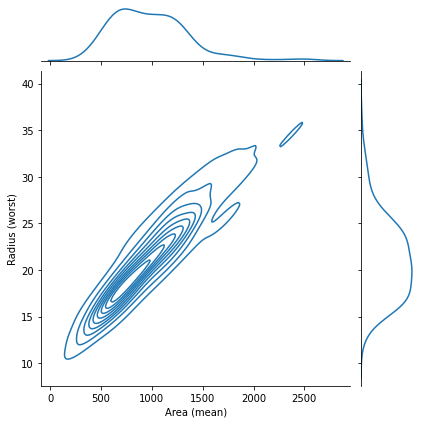

In [49]:
sns.jointplot(x=cancer_m_data['Area (mean)'], y=cancer_m_data['Radius (worst)'], kind='kde')

plt.xlabel('Area (media)')
plt.ylabel('Radio (worst)')